In [ ]:
import numpy as np
import pandas as pd
from scipy import stats


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/IUH-Teach/TKMT/TK3/ontapTK3

/content/drive/MyDrive/IUH-Teach/TKMT/TK3/ontapTK3


### **Bài 1.**
Trên tập mẫu gồm 100 số liệu, người ta tính được $\bar{x} = 0.1$ và $s = 0.014$. Xác định khoảng tin cậy 95% cho giá trị trung bình thật.

Gọi $\mu$ là giá trị trung bình thật của tập mẫu. Ta có, $\bar{x}$ là giá trị trung bình của 100 số liệu.

Độ tin cậy $95\% = 1 - \alpha$ => $\alpha=0.05$

Ta có $n = 100 > 30$. => ta sấp sỉ phân phối trên với phân phối chuẩn, ta có:
$$\bigg(\bar{x} - z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}},\bar{x}+z_{\frac{\alpha}{2}}\frac{s}{\sqrt{n}}\bigg)$$
Trong đó, $\alpha = 5\% = 0.05$, $z_{\frac{\alpha}{2}}=z_{0.975}=1.96$, $\bar{x}=0.1$, $s=0.014$


In [ ]:
x = 0.1
s = 0.014
n = 100
alpha = 0.05
z = stats.norm.ppf(1-alpha/2)
print(x-z*s/np.sqrt(n), x+z*s/np.sqrt(n))

0.09725605042164392 0.10274394957835609


Vậy khoảng giá trị trung bình thật là: (0,097;0.102) với khoảng tin cậy 95%

### **Bài 2**

Dataset 18 (__M&M__) chứa thông tin trọng lượng và màu sắc của mẫu các viên kẹo của hãng M&M.

Sử dụng mẫu trên bạn hãy kiểm tra phát biểu sau: __"20% kẹo M&M có màu đỏ"__ với mức ý nghĩa là 5%

In [ ]:
data = pd.read_excel("18_M&M.xls")
data.head()

,Red,Orange,Yellow,Brown,Blue,Green
0,0.751,0.735,0.883,0.696,0.881,0.925
1,0.841,0.895,0.769,0.876,0.863,0.914
2,0.856,0.865,0.859,0.855,0.775,0.881
3,0.799,0.864,0.784,0.806,0.854,0.865
4,0.966,0.852,0.824,0.840,0.810,0.865


In [ ]:
n = data.count().sum()
print("Số mẫu N: ",n)
red = data.count().Red
print("Số mẫu đỏ n: ",red)
p_mu = red/n
print("Tỉ lệ màu đỏ trên mẫu p_mu: ",p_mu)

Số mẫu N:  100
Số mẫu đỏ n:  13
Tỉ lệ màu đỏ trên mẫu p_mu:  0.13


Gọi $p$ là tỷ lệ kẹo M&M có màu đỏ. Ta cần kiểm định giả thuyết:

$H_0 : p = 0.2$: 20% kẹo M&M có màu đỏ

$H_1: p \neq 0.2$: tỉ lệ kẹo màu đỏ khác $20\%$

Mức ý nghĩa là: $5\% => \alpha=0.05$

In [ ]:
p = 0.2
alpha = 5/100

- Các quan sát mẫu là một mẫu ngẫu nhiên đơn giản, các viên kẹo là độc lập nên tỷ lệ kẹo màu đỏ là tuân theo phân phối nhị thức.
- Ta có
    - $\hat{p} = 0.13$ là tỷ lệ kẹo màu đỏ.
    - $n=100 > 30$,
    - $\hat{p}=0.13$, $n\hat{p}=100\times0.13=13 \geq 5$
    -
  $n(1-\hat{p}) = 100(1-0.13)= 87 \geq 5$
=> Vậy phân phối nhị thức của tỷ lệ mẫu có thể xấp xỉ bằng phân phối chuẩn.
$$z=\frac{\hat{p}-p}{\sqrt{\frac{pq}{n}}}$$

In [ ]:
z = (p_mu - p)/np.sqrt(p*(1-p)/n)
print("z =", z)

z = -1.7500000000000002


Vì $H_1$ là $\neq$ => là kiểm định **hai đuôi** nên ta có
$$p_{values} = P(Z<z) + P(Z>(-z))$$

In [ ]:
p_value = stats.norm.cdf(-np.abs(z))*2 # = stats.norm.cdf(z)+ (1-stats.norm.cdf(-z))
print("p_value là: ", p_value)
if p_value < alpha:
    print('Reject H0')
else:
    print('Accept H0')

p_value là:  0.08011831372763414
Accept H0


Vì $p_{value} = 0.08 > \alpha=0.05$ nên ta kết luận: không có bằng chứng để bác bỏ giả thuyết tỉ lệ kẹo M&M có màu đỏ là $20\%$

### **Bài 3**

Nghiên cứu mức thu nhập X(\$) và chi tiêu Y(\$) trong một tháng của một công ty. Khảo sát ngẫu nhiên 7 nhân viên, ta thu được bảng số liệu sau:

| X            | 130     | 150      | 133      | 170      | 170      | 210      | 230      |
| :----------: | :-----: | :------: | :------: | :------: | :------: | :------: | :------: |
| **Y**        | **84**  | **120**  | **108**  | **130**  | **130**  | **150**  | **160**  |


a. Dựa vào bảng dữ liệu trên cho biết có xây dựng được mô hình hồi quy hay không? Nếu có hãy xây dựng mô hình hồi quy để ước tính chi tiêu dựa theo thu nhập

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

In [ ]:
X = np.array([130,150,133,170,170,210, 230])
Y = np.array([84,120,108,130,130,150,160])

Ta có biến phụ thuộc là $Y$ và biến giải thích là $X$

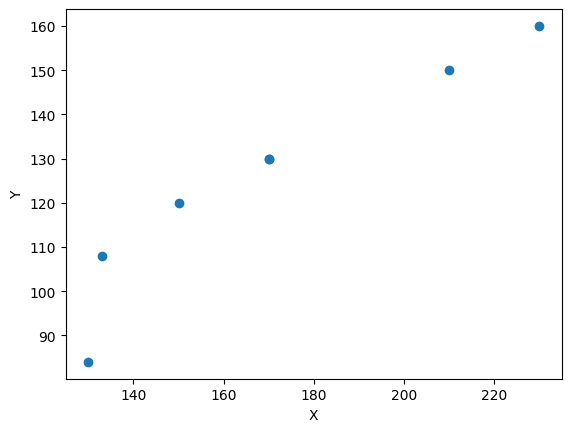

In [ ]:
# plot X,Y
import matplotlib.pyplot as plt
plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# covariance và correlation coefficient của X và Y
cov = np.cov(X,Y)
print("Covariance: \n", cov)
corr = np.corrcoef(X,Y)
print("Correlation coefficient: \n", corr)

Covariance: 
 [[1427.95238095  911.        ]
 [ 911.          648.        ]]
Correlation coefficient: 
 [[1.         0.94705241]
 [0.94705241 1.        ]]


Ta thấy hệ số tương quan của $X$ và $Y$ là $0.94$ nên mối quan thuận, tức là nếu $X$ tăng thì $Y$ cũng sẽ tăng.

Vậy có thể xây dựng mô hình hồi quy giữa $X$ và $Y$: $$Y=\beta_0+\beta_1X$$

In [ ]:
x_bar = np.mean(X)
y_bar = np.mean(Y)
print("x_bar = ", x_bar)
print("y_bar = ", y_bar)
beta_1 = np.sum((X-x_bar)*(Y-y_bar))/np.sum((X-x_bar)**2)
beta_0 = y_bar - beta_1*x_bar
print("beta_1 = ", beta_1)
print("beta_0 = ", beta_0)

x_bar =  170.42857142857142
y_bar =  126.0
beta_1 =  0.6379764564644679
beta_0 =  17.270583919698552


Vậy mô hình hồi quy giữ chi tiêu $Y$ và thu nhập $X$ là: $$Y\approx17,27+0.638X$$

b. Dự đoán mức chi tiêu của nhân viên công ty trên nếu biết thu nhập là 200$

Thu nhâp là 200\$ => $X=200$ . Thay $X$ vào công thức hồi quy ta xây dựng bên trên.

In [ ]:
X1 = 200
Y1 = beta_0 + beta_1*X1
print("Y1 = ", Y1)

Vậy chi tiêu của nhân viên công ty khoảng 144,87\$ nêú thu nhập là 200\$